#Import Library

In [ ]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import specificity_score, sensitivity_score
from yellowbrick.target import ClassBalance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/Data Curah Hujan 2019-2023.xlsx')
data

,Tanggal,X1,X2,X3,X4,X5,RR
0,2019-01-01 00:00:00,28.0,77.0,4.6,360.0,4,0.0
1,2019-01-02 00:00:00,28.2,75.0,7.1,340.0,3,0.0
2,2019-01-03 00:00:00,28.1,74.0,8.8,320.0,3,0.0
3,2019-01-04 00:00:00,27.2,81.0,NaN,320.0,1,8.7
4,2019-01-05 00:00:00,28.5,77.0,2.7,230.0,2,NaN
...,...,...,...,...,...,...,...
1803,2023-12-27 00:00:00,27.1,85.0,3.2,40.0,2,0.0
1804,2023-12-28 00:00:00,26.9,88.0,NaN,40.0,2,1.5
1805,2023-12-29 00:00:00,26.0,95.0,NaN,40.0,2,2.0
1806,2023-12-30 00:00:00,25.9,92.0,2.6,50.0,2,52.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1808 non-null   object 
 1   X1       1798 non-null   float64
 2   X2       1798 non-null   float64
 3   X3       1736 non-null   float64
 4   X4       1807 non-null   float64
 5   X5       1808 non-null   int64  
 6   RR       1542 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 99.0+ KB


#Preprocessing

In [ ]:
data.isnull().sum()

Tanggal      0
X1          10
X2          10
X3          72
X4           1
X5           0
RR         266
dtype: int64

In [ ]:
 # Interpolasi linear
data.interpolate(method='linear', inplace=True)

In [ ]:
# Fungsi untuk mengubah nilai curah hujan ke kategori yang diberikan
def categorize_curah_hujan(curah_hujan):
    if curah_hujan <= 0.5:
        return 'Tidak Hujan'
    else:
        return 'Hujan'

# Terapkan fungsi pada kolom 'Curah_Hujan' untuk membuat kolom baru 'Kategori_Curah_Hujan'
data['RR_c'] = data['RR'].apply(categorize_curah_hujan)

# Tampilkan DataFrame hasil
print(data)

                  Tanggal    X1    X2    X3     X4  X5    RR         RR_c
0     2019-01-01 00:00:00  28.0  77.0  4.60  360.0   4   0.0  Tidak Hujan
1     2019-01-02 00:00:00  28.2  75.0  7.10  340.0   3   0.0  Tidak Hujan
2     2019-01-03 00:00:00  28.1  74.0  8.80  320.0   3   0.0  Tidak Hujan
3     2019-01-04 00:00:00  27.2  81.0  5.75  320.0   1   8.7        Hujan
4     2019-01-05 00:00:00  28.5  77.0  2.70  230.0   2  10.0        Hujan
...                   ...   ...   ...   ...    ...  ..   ...          ...
1803  2023-12-27 00:00:00  27.1  85.0  3.20   40.0   2   0.0  Tidak Hujan
1804  2023-12-28 00:00:00  26.9  88.0  3.00   40.0   2   1.5        Hujan
1805  2023-12-29 00:00:00  26.0  95.0  2.80   40.0   2   2.0        Hujan
1806  2023-12-30 00:00:00  25.9  92.0  2.60   50.0   2  52.1        Hujan
1807  2023-12-31 00:00:00  25.6  96.0  1.80  340.0   2  30.3        Hujan

[1808 rows x 8 columns]


In [ ]:
# Fungsi untuk mengubah nilai curah hujan menjadi kategori angka
def map_curah_hujan_to_numeric(curah_hujan):
    if curah_hujan <= 0.5:
        return 0
    else:
        return 1

# Terapkan fungsi pada kolom 'Curah_Hujan' untuk membuat kolom baru 'Numeric_Curah_Hujan'
data['Y'] = data['RR'].apply(map_curah_hujan_to_numeric)

# Tampilkan DataFrame hasil
data

,Tanggal,X1,X2,X3,X4,X5,RR,RR_c,Y
0,2019-01-01 00:00:00,28.0,77.0,4.60,360.0,4,0.0,Tidak Hujan,0
1,2019-01-02 00:00:00,28.2,75.0,7.10,340.0,3,0.0,Tidak Hujan,0
2,2019-01-03 00:00:00,28.1,74.0,8.80,320.0,3,0.0,Tidak Hujan,0
3,2019-01-04 00:00:00,27.2,81.0,5.75,320.0,1,8.7,Hujan,1
4,2019-01-05 00:00:00,28.5,77.0,2.70,230.0,2,10.0,Hujan,1
...,...,...,...,...,...,...,...,...,...
1803,2023-12-27 00:00:00,27.1,85.0,3.20,40.0,2,0.0,Tidak Hujan,0
1804,2023-12-28 00:00:00,26.9,88.0,3.00,40.0,2,1.5,Hujan,1
1805,2023-12-29 00:00:00,26.0,95.0,2.80,40.0,2,2.0,Hujan,1
1806,2023-12-30 00:00:00,25.9,92.0,2.60,50.0,2,52.1,Hujan,1


In [ ]:
data.to_excel('Data Curah Hujan 2019-2023 (interpolasi).xlsx')

#Statistika Deskriptif

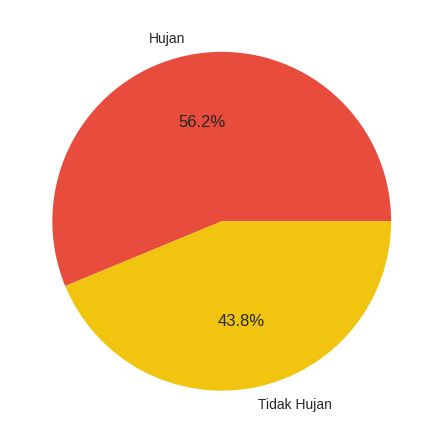

In [ ]:
# Hitung jumlah hujan dan tidak hujan
tidak_hujan = data["RR_c"].value_counts()[1]
hujan = data["RR_c"].value_counts()[0]

# Buat pie chart
labels = ["Hujan", "Tidak Hujan"]
sizes = [hujan, tidak_hujan]
colors = ["#E74C3C", "#F1C40F"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,RR,Y
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,27.118722,82.463219,4.532218,194.599004,1.535951,8.627323,0.562500
std,1.091286,6.050164,2.569024,103.478740,0.680043,15.576709,0.496216
min,23.400000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.400000,78.000000,2.600000,140.000000,1.000000,0.000000,0.000000
50%,27.200000,82.000000,4.600000,180.000000,2.000000,1.400000,1.000000
75%,27.900000,87.000000,6.600000,300.000000,2.000000,10.125000,1.000000
max,30.500000,100.000000,10.400000,360.000000,4.000000,160.400000,1.000000


In [ ]:
data.groupby('Y').size()

Y
0     791
1    1017
dtype: int64

In [ ]:
X = data.loc[:,[ 'X1', 'X2', 'X3', 'X4', 'X5']]
y = data["Y"]
print(X)
print(y)

        X1    X2    X3     X4  X5
0     28.0  77.0  4.60  360.0   4
1     28.2  75.0  7.10  340.0   3
2     28.1  74.0  8.80  320.0   3
3     27.2  81.0  5.75  320.0   1
4     28.5  77.0  2.70  230.0   2
...    ...   ...   ...    ...  ..
1803  27.1  85.0  3.20   40.0   2
1804  26.9  88.0  3.00   40.0   2
1805  26.0  95.0  2.80   40.0   2
1806  25.9  92.0  2.60   50.0   2
1807  25.6  96.0  1.80  340.0   2

[1808 rows x 5 columns]
0       0
1       0
2       0
3       1
4       1
       ..
1803    0
1804    1
1805    1
1806    1
1807    1
Name: Y, Length: 1808, dtype: int64


#Without Normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1446, 5)
(362, 5)


In [ ]:
data_test = pd.DataFrame(y_test)
data_test.to_excel('Data testing.xlsx')

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
pred_tanpa = pd.DataFrame(y_pred)

print("hasil prediksi: kategori curah hujan (tanpa normalisasi)", pred_tanpa)

hasil prediksi: kategori curah hujan (tanpa normalisasi)      0
0    1
1    1
2    0
3    1
4    1
..  ..
357  1
358  1
359  0
360  1
361  0

[362 rows x 1 columns]


In [ ]:
pred_tanpa.to_excel('Data Prediksi (tanpa).xlsx')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
spesifisitas = specificity_score(y_test, y_pred)
sensitivitas = sensitivity_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Spesifisitas: {spesifisitas}")
print(f"Sensitivitas: {sensitivitas}")

Accuracy: 0.6602209944751382
Spesifisitas: 0.4240506329113924
Sensitivitas: 0.8431372549019608


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 67  91]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.68      0.42      0.52       158
           1       0.65      0.84      0.74       204

    accuracy                           0.66       362
   macro avg       0.67      0.63      0.63       362
weighted avg       0.66      0.66      0.64       362



#Z Score Normalization

In [ ]:
scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

In [ ]:
Zscore = pd.DataFrame(X_zscore)

In [ ]:
Zscore.to_excel('Data Curah Hujan 2019-2023 (Z-score).xlsx')

In [ ]:
Zscore.describe()

,0,1,2,3,4
count,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03
mean,4.527352e-15,2.043596e-16,-1.002148e-16,-8.645985e-17,1.021798e-16
std,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00
min,-3.408596e+00,-2.887203e+00,-1.764667e+00,-1.881090e+00,-2.259233e+00
25%,-6.587838e-01,-7.379062e-01,-7.523295e-01,-5.277810e-01,-7.883316e-01
50%,7.449942e-02,-7.658423e-02,2.639167e-02,-1.411212e-01,6.825699e-01
75%,7.161222e-01,7.500683e-01,8.051129e-01,1.018858e+00,6.825699e-01
max,3.099293e+00,2.899365e+00,2.284683e+00,1.598848e+00,3.624373e+00


In [ ]:
X_train_zscore, X_test_zscore, y_train_zscore, y_test_zscore = train_test_split(X_zscore, y, test_size=0.2, random_state=35, stratify = y)

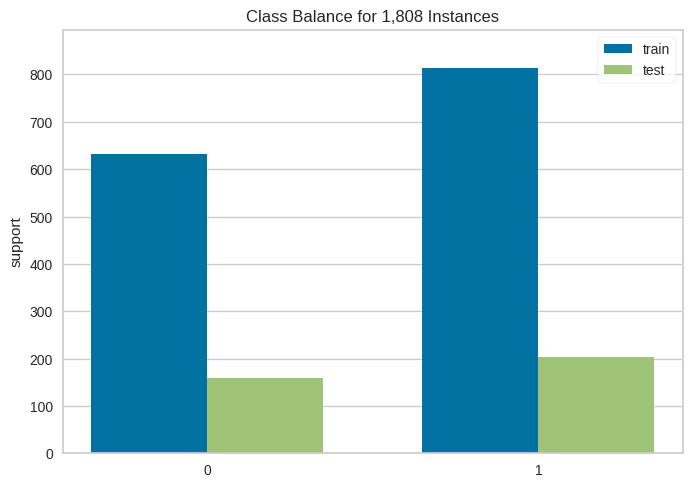

<Axes: title={'center': 'Class Balance for 1,808 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train_zscore, y_test_zscore)
visualizer.poof()

In [ ]:
data_test_zscore = pd.DataFrame(y_test_zscore)
data_test_zscore.to_excel('Data testing (zscore).xlsx')

In [ ]:
model_zscore = SVC()
model_zscore.fit(X_train_zscore, y_train_zscore)

SVC()

In [ ]:
y_pred_zscore = model_zscore.predict(X_test_zscore)
pred_zscore = pd.DataFrame(y_pred_zscore)

print("hasil prediksi: kategori curah hujan (zscore)", pred_zscore)

hasil prediksi: kategori curah hujan (zscore)      0
0    1
1    1
2    0
3    1
4    1
..  ..
357  1
358  0
359  0
360  1
361  0

[362 rows x 1 columns]


In [ ]:
pred_zscore.to_excel('Data Prediksi (zscore).xlsx')

In [ ]:
accuracy_zscore = accuracy_score(y_test_zscore, y_pred_zscore)
spesifisitas = specificity_score(y_test_zscore, y_pred_zscore)
sensitivitas = sensitivity_score(y_test_zscore, y_pred_zscore)

print("Accuracy:", accuracy_zscore)
print(f"Spesifisitas: {spesifisitas}")
print(f"Sensitivitas: {sensitivitas}")

Accuracy: 0.7458563535911602
Spesifisitas: 0.6392405063291139
Sensitivitas: 0.8284313725490197


In [ ]:
print(confusion_matrix(y_test_zscore, y_pred_zscore))
print(classification_report(y_test_zscore, y_pred_zscore))

[[101  57]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       158
           1       0.75      0.83      0.79       204

    accuracy                           0.75       362
   macro avg       0.75      0.73      0.74       362
weighted avg       0.75      0.75      0.74       362



#Min-Max Normalization

In [ ]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

In [ ]:
minmax = pd.DataFrame(X_minmax)

In [ ]:
minmax.to_excel('Data Curah Hujan 2019-2023 (minmax).xlsx')

In [ ]:
minmax.describe()

,0,1,2,3,4
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,0.523764,0.498949,0.435790,0.540553,0.383988
std,0.153702,0.172862,0.247022,0.287441,0.170011
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.422535,0.371429,0.250000,0.388889,0.250000
50%,0.535211,0.485714,0.442308,0.500000,0.500000
75%,0.633803,0.628571,0.634615,0.833333,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.2, random_state=35, stratify = y)

In [ ]:
model_minmax = SVC()
model_minmax.fit(X_train_minmax, y_train_minmax)

SVC()

In [ ]:
y_pred_minmax = model_minmax.predict(X_test_minmax)
pred_minmax = pd.DataFrame(y_pred_minmax)

print("hasil prediksi: kategori curah hujan (minmax)", pred_minmax)

hasil prediksi: kategori curah hujan (minmax)      0
0    1
1    1
2    0
3    1
4    1
..  ..
357  1
358  0
359  0
360  1
361  0

[362 rows x 1 columns]


In [ ]:
pred_minmax.to_excel('Data Prediksi (minmax).xlsx')

In [ ]:
accuracy_minmax = accuracy_score(y_test_minmax, y_pred_minmax)
spesifisitas = specificity_score(y_test_minmax, y_pred_minmax)
sensitivitas = sensitivity_score(y_test_minmax, y_pred_minmax)

print("Accuracy:", accuracy_minmax)
print(f"Spesifisitas: {spesifisitas}")
print(f"Sensitivitas: {sensitivitas}")

Accuracy: 0.7403314917127072
Spesifisitas: 0.6392405063291139
Sensitivitas: 0.8186274509803921


In [ ]:
print(confusion_matrix(y_test_minmax, y_pred_minmax))
print(classification_report(y_test_minmax, y_pred_minmax))

[[101  57]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       158
           1       0.75      0.82      0.78       204

    accuracy                           0.74       362
   macro avg       0.74      0.73      0.73       362
weighted avg       0.74      0.74      0.74       362



#Robust Normalization

In [ ]:
robust = RobustScaler()
X_robust = robust.fit_transform(X)

In [ ]:
robust = pd.DataFrame(X_robust)

In [ ]:
robust.to_excel('Data Curah Hujan 2019-2023 (robust).xlsx')

In [ ]:
robust.describe()

,0,1,2,3,4
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,-0.054185,0.051469,-0.016946,0.091244,-0.464049
std,0.727524,0.672240,0.642256,0.646742,0.680043
min,-2.533333,-1.888889,-1.150000,-1.125000,-2.000000
25%,-0.533333,-0.444444,-0.500000,-0.250000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.466667,0.555556,0.500000,0.750000,0.000000
max,2.200000,2.000000,1.450000,1.125000,2.000000


In [ ]:
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_robust, y, test_size=0.2, random_state=35, stratify = y)

In [ ]:
model_robust = SVC()
model_robust.fit(X_train_robust, y_train_robust)

SVC()

In [ ]:
y_pred_robust = model_robust.predict(X_test_robust)
pred_robust = pd.DataFrame(y_pred_robust)

print("hasil prediksi: kategori curah hujan (robust)", pred_robust)

hasil prediksi: kategori curah hujan (robust)      0
0    1
1    1
2    0
3    1
4    1
..  ..
357  1
358  0
359  0
360  1
361  0

[362 rows x 1 columns]


In [ ]:
pred_robust.to_excel('Data Prediksi (robust).xlsx')

In [ ]:
accuracy_robust = accuracy_score(y_test_robust, y_pred_robust)
spesifisitas = specificity_score(y_test_robust, y_pred_robust)
sensitivitas = sensitivity_score(y_test_robust, y_pred_robust)

print("Accuracy:", accuracy_robust)
print(f"Spesifisitas: {spesifisitas}")
print(f"Sensitivitas: {sensitivitas}")

Accuracy: 0.7430939226519337
Spesifisitas: 0.6329113924050633
Sensitivitas: 0.8284313725490197


In [ ]:
print(confusion_matrix(y_test_robust, y_pred_robust))
print(classification_report(y_test_robust, y_pred_robust))

[[100  58]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       158
           1       0.74      0.83      0.78       204

    accuracy                           0.74       362
   macro avg       0.74      0.73      0.73       362
weighted avg       0.74      0.74      0.74       362



#Max Absolut Normalization

In [ ]:
maxabs = MaxAbsScaler()
X_maxabs = maxabs.fit_transform(X)

In [ ]:
maxabs = pd.DataFrame(X_maxabs)

In [ ]:
maxabs.to_excel('Data Curah Hujan 2019-2023 (maxabs).xlsx')

In [ ]:
maxabs.describe()

,0,1,2,3,4
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,0.889138,0.824632,0.435790,0.540553,0.383988
std,0.035780,0.060502,0.247022,0.287441,0.170011
min,0.767213,0.650000,0.000000,0.000000,0.000000
25%,0.865574,0.780000,0.250000,0.388889,0.250000
50%,0.891803,0.820000,0.442308,0.500000,0.500000
75%,0.914754,0.870000,0.634615,0.833333,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_maxabs, X_test_maxabs, y_train_maxabs, y_test_maxabs = train_test_split(X_maxabs, y, test_size=0.2, random_state=35, stratify = y)


In [ ]:
model_maxabs = SVC()
model_maxabs.fit(X_train_maxabs, y_train_maxabs)

SVC()

In [ ]:
y_pred_maxabs = model_maxabs.predict(X_test_maxabs)
pred_maxabs = pd.DataFrame(y_pred_maxabs)

print("hasil prediksi: kategori curah hujan (maxabs)", pred_maxabs)

hasil prediksi: kategori curah hujan (maxabs)      0
0    1
1    1
2    0
3    1
4    1
..  ..
357  1
358  0
359  0
360  1
361  0

[362 rows x 1 columns]


In [ ]:
pred_maxabs.to_excel('Data Prediksi (maxabs).xlsx')

In [ ]:
accuracy_maxabs = accuracy_score(y_test_maxabs, y_pred_maxabs)
spesifisitas = specificity_score(y_test_maxabs, y_pred_maxabs)
sensitivitas = sensitivity_score(y_test_maxabs, y_pred_maxabs)

print("Accuracy:", accuracy_maxabs)
print(f"Spesifisitas: {spesifisitas}")
print(f"Sensitivitas: {sensitivitas}")

Accuracy: 0.7430939226519337
Spesifisitas: 0.6329113924050633
Sensitivitas: 0.8284313725490197


In [ ]:
print(confusion_matrix(y_test_maxabs, y_pred_maxabs))
print(classification_report(y_test_maxabs, y_pred_maxabs))

[[100  58]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       158
           1       0.74      0.83      0.78       204

    accuracy                           0.74       362
   macro avg       0.74      0.73      0.73       362
weighted avg       0.74      0.74      0.74       362

